
# Adding Limit Orders to the Trading Bot (Take Profit & Stop Loss) 

In [1]:
import sys
sys.path.append("../")
from trading.api import OANDA_API
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timedelta, timezone
import time
import pytz
from datetime import datetime

import matplotlib.pyplot as plt
from trading import MyTT

In [2]:
instrument = "EUR_HKD"
bar_length = timedelta(minutes = 1)
SMA = 200
dev = 2

In [3]:
# raw_data = None
# now = datetime.utcnow()
       
# now = now - timedelta(microseconds = now.microsecond)
# past = now - timedelta(days = 2)


# print (f"Getting candles for {instrument}, from {past} to {now}")

# raw_df = tpqoa.tpqoa("../../config/oanda_demo.cfg").get_history(instrument = instrument, start = past, end = now,
#                        granularity = "S30", price = "M", localize = True).c.dropna().to_frame()

# raw_df.rename(columns = {"c":instrument}, inplace = True)


# # last_bar = raw_data.index[-1].to_pydatetime().replace(tzinfo=None)
        

In [4]:
# raw_df = pd.read_pickle(f"../../data/backtest_{instrument}.pcl")

In [5]:
api = OANDA_API("../../config/oanda.cfg")
raw_df = api.get_history_with_all_prices(instrument, 30)

In [6]:
raw_df

,ask,bid,EUR_HKD
time,,,
2024-01-26 18:08:30,8.49030,8.48883,8.489565
2024-01-26 18:09:00,8.49070,8.48929,8.489995
2024-01-26 18:09:30,8.49040,8.48903,8.489715
2024-01-26 18:10:00,8.49051,8.48908,8.489795
2024-01-26 18:10:30,8.49060,8.48921,8.489905
...,...,...,...
2024-02-23 21:57:00,8.47043,8.46220,8.466315
2024-02-23 21:57:30,8.47034,8.45927,8.464805
2024-02-23 21:58:00,8.47075,8.46253,8.466640


In [7]:
df = raw_df.copy()
    
df["SMA"] = df[instrument].rolling(SMA).mean()
std = df[instrument].rolling(SMA).std() * dev

df["Lower"] = df["SMA"] - std
df["Upper"] = df["SMA"] + std

df


,ask,bid,EUR_HKD,SMA,Lower,Upper
time,,,,,,
2024-01-26 18:08:30,8.49030,8.48883,8.489565,NaN,NaN,NaN
2024-01-26 18:09:00,8.49070,8.48929,8.489995,NaN,NaN,NaN
2024-01-26 18:09:30,8.49040,8.48903,8.489715,NaN,NaN,NaN
2024-01-26 18:10:00,8.49051,8.48908,8.489795,NaN,NaN,NaN
2024-01-26 18:10:30,8.49060,8.48921,8.489905,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-02-23 21:57:00,8.47043,8.46220,8.466315,8.467140,8.465421,8.468860
2024-02-23 21:57:30,8.47034,8.45927,8.464805,8.467125,8.465378,8.468873
2024-02-23 21:58:00,8.47075,8.46253,8.466640,8.467119,8.465373,8.468866


In [26]:
filtered_df = df.query("time >= '2024-02-12 06:45:00' and time < '2024-02-12 08:25:00'")

In [27]:
# M = filtered_df["SMA"].values
# M = pd.Series(M)
# poly = np.polyfit(M.index, M.values, deg=1)
# poly
slope = MyTT.SLOPE(filtered_df[instrument].values)
slope = round(slope, 6)
slope

4e-06

In [28]:
'{0:f}'.format(slope)

'0.000004'

<Axes: xlabel='time'>

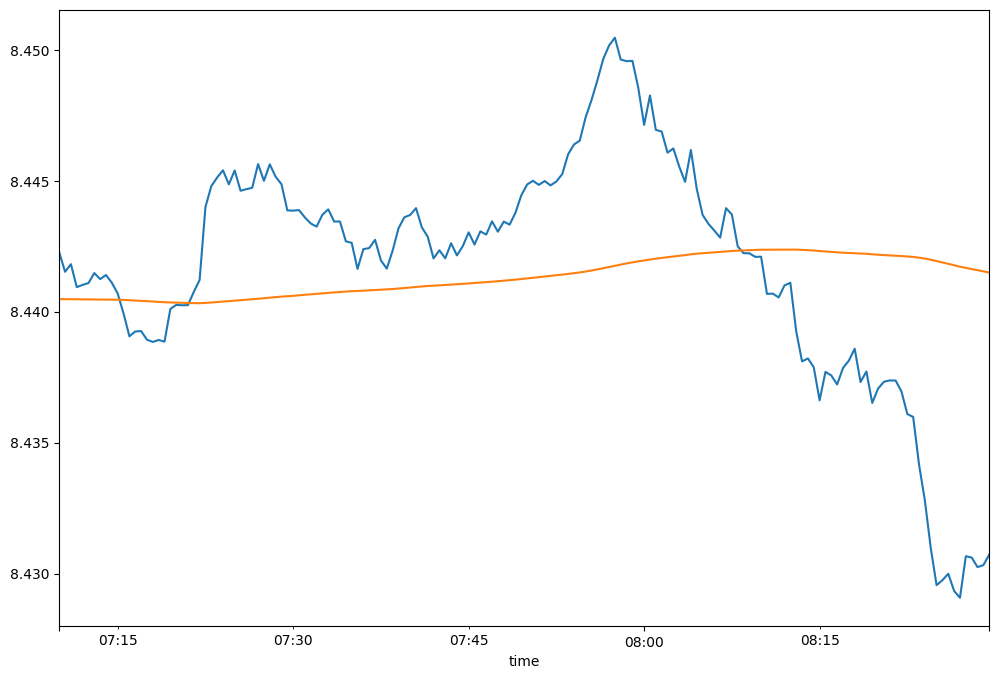

In [19]:
filtered_df[instrument].plot(figsize = (12, 8))
filtered_df["SMA"].plot(figsize = (12, 8))